In [ ]:
import numpy
import pandas

MUSHROOM_DATASET_FILE = 'mushrooms.csv'
LEARING_RATE = 0.3
ITERATIONS = 1000
PART_TO_TRAIN = 0.7

#Reading dataset and try to clean it
Target parameter it's mushroom class, features need select use gain ratio or correlation matrix

In [ ]:
dataset = pandas.read_csv(MUSHROOM_DATASET_FILE)

print(dataset.isna().sum())
print(dataset.isin(['?']).any(axis = 1).values.tolist())

dataset = dataset[(dataset != '?').all(axis=1)]

dataset_list = dataset.values.tolist()

target_values = numpy.array([i[0] for i in dataset_list])
features_values = numpy.array([i[1:] for i in dataset_list])

print(len(target_values))

count_train_values = (int(len(target_values) * PART_TO_TRAIN))

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

#Find best features

In [ ]:
def entropy(probabilities: list[float]) -> float:
    result = 0.0
    for value in probabilities:
        if (value > 0):
            result += value * numpy.log2(value)

    return -result

def entropy_by_unique(values):
    values, cnt = numpy.unique(values, return_counts = True)
    probabilities = cnt / len(values)
    return -numpy.sum(probabilities * numpy.log2(probabilities))

def gain_ratio(features, target):
    target_entropy = entropy_by_unique(target)
    split_info = entropy_by_unique(features)
    values, cnt = numpy.unique(features, return_counts = True)
    split_entropy = numpy.sum([(cnt / len(features)) * entropy_by_unique(target[features == value]) for value in zip(values, count)])
    return (target_entropy - split_entropy) / split_info

for feature in features_values.T:
    print(gain_ratio(feature, target_values))


NameError: name 'count' is not defined

#Interested targets: odor, ring-type, spore-print-color, stalk-surface-above-ring

Need convert to mathematical format(numbers)

In [ ]:
print(features_values[:, [4, 11, 18, 19]])
selected_features = features_values[:, [4, 11, 18, 19]]
features_in_num_format = numpy.array([[ord(val) - ord('a') for val in features] for features in selected_features])
target_in_num_format = numpy.zeros((len(target_values), 1), dtype = int)

for i, value in enumerate(target_values):
    if value == 'p':
        target_in_num_format[i] = [1]
    else:
        target_in_num_format[i] = [0]

features_values_for_train = features_in_num_format[:count_train_values]
features_values_for_test = features_in_num_format[count_train_values:]

target_values_for_train = target_in_num_format[:count_train_values]
target_values_for_test = target_in_num_format[count_train_values:]

#Need standartization it with Z Score

In [ ]:
avg = features_in_num_format.mean()
sigma = features_in_num_format.std()

features_in_num_format = (features_in_num_format - avg) / sigma

#Use perceptron classifler in last lab part

In [ ]:
def sigmoid(arg):
    return 1 / (1 + numpy.exp(-arg))

def derivative_by_arg(arg):
    return sigmoid(arg) * (1 - sigmoid(arg))

def derivative_by_sigmoid_result(sigmoid_func_result):
    return sigmoid_func_result * (1 - sigmoid_func_result)

# def get_stored_interval(value: float) -> str:
#   if (value <= 15000):
#     return "1"
#   elif (value <= 25000):
#     return "2"
#   else:
#     return "3"

# dataset_answers = []

# for val in target_values:
#   tmp = [0] * 3
#   tmp[int(get_stored_interval(val)) - 1] = 1
#   dataset_answers.append(tmp)

# dataset_answers = numpy.array(dataset_answers)

# target_values_for_train = dataset_answers[:train_rows_count]
# target_values_for_test = dataset_answers[-test_rows_count:]

def forward(features, layers_weights, bias):
  result = []

  result.append(features)
  for i in range(len(layers_weights)):
    linear_sum = numpy.dot(result[-1], layers_weights[i]) + bias[i]
    result.append(sigmoid(linear_sum))

  return result

def backward(features, target_results, result, layers_weights, bias):
  normalize_coef = features.shape[0]
  last_layer_result = result[-1]
  err = target_results - last_layer_result

  layer_idx = len(layers_weights) - 1
  while(layer_idx >= 0):
    if layer_idx == len(layers_weights) - 1:
      current_layer_delta = err * derivative_by_sigmoid_result(last_layer_result)
    else:
      err = current_layer_delta.dot(layers_weights[layer_idx + 1].T)
      current_layer_delta = err * derivative_by_sigmoid_result(result[layer_idx + 1])

    layers_weights[layer_idx] += result[layer_idx].T.dot(current_layer_delta) * LEARING_RATE / normalize_coef
    bias[layer_idx] += numpy.sum(current_layer_delta, axis = 0, keepdims = True) * LEARING_RATE / normalize_coef

    layer_idx -= 1

  return layers_weights, bias


def learing(features_values, targer_results, layers):
  layers_weights = []
  bias = []

  for i in range(len(layers) - 1):
    layers_weights.append(numpy.random.uniform(size=(layers[i], layers[i + 1])))
    bias.append(numpy.random.uniform(size=(1, layers[i + 1])))

  for _ in range(ITERATIONS):
    result = forward(features_values, layers_weights, bias)
    layers_weights, bias = backward(features_values, targer_results, result, layers_weights, bias)

  return layers_weights, bias

layer_sizes = [features_values_for_train.shape[1], 30, 1]

layers_weights, bias = learing(features_values_for_train, target_values_for_train, layer_sizes)


# Analyze perceptron accuracy and metrics recall, precision and summary: F-Score
# Analyze perceptron accuracy and metrics recall, precision and summary: F-score
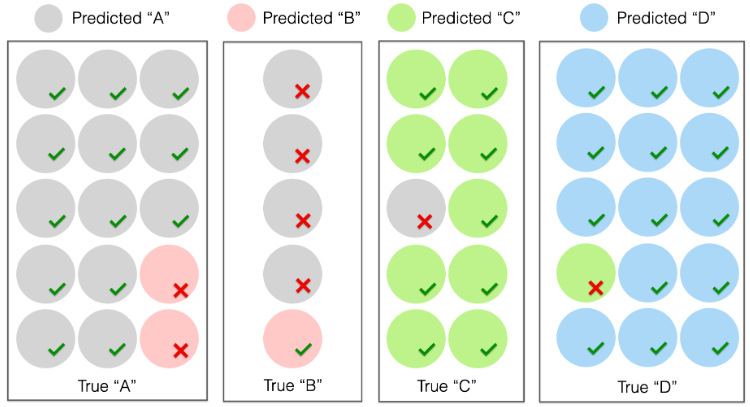

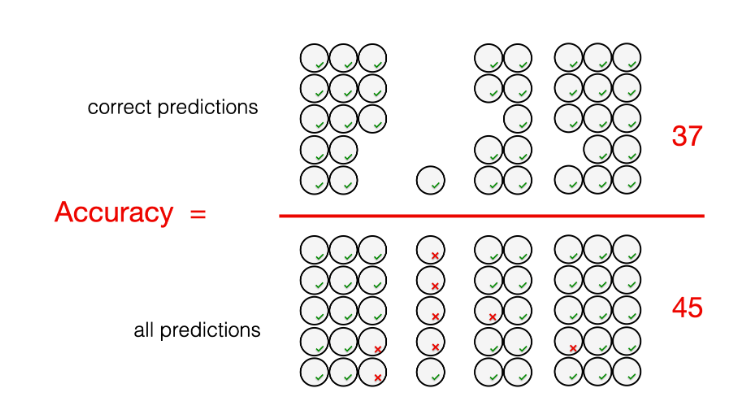

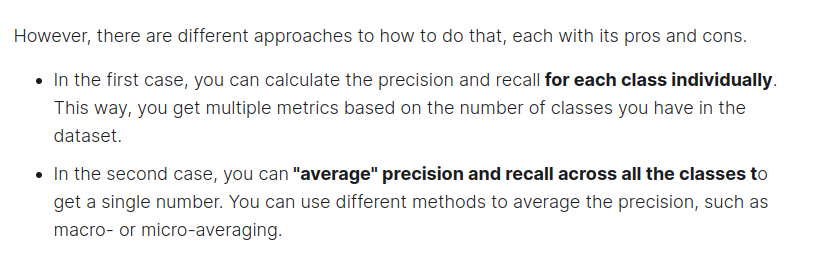

In [ ]:
result = forward(features_values_for_test, layers_weights, bias)
predictions = []

for val in result[-1]:
    prediction = numpy.where(val < 0.5, 0, 1)
    predictions.append(prediction)

result = numpy.column_stack((target_values_for_test, predictions))

#slicing percetron predicts and correct results

target = result[:, 0]
result = result[:, 1]

TP = numpy.sum(numpy.logical_and(result == 1, target == 1))
FP = numpy.sum(numpy.logical_and(result == 0, target == 1))
FN = numpy.sum(numpy.logical_and(result == 1, target == 0))

print(f"Accuracy: {TP / len(target_values_for_test) * 100} %")

precision = TP / (FP + TP)
recall = TP / (FN + TP)
FScore = 2 * recall * precision / (recall + precision)

print('precision ', precision)
print('recall: ', recall)
print('F-Score: ', FScore)